In [6]:
import glob
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import warnings
from matplotlib.colors import LogNorm
from datetime import datetime, timedelta
from matplotlib.colors import LogNorm
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams.update({'font.size': 15})

In [2]:
SITE = 'MQT'

pip_path = '../data/PIP/2019_' + SITE + '/netCDF/'
mrr_path = '../data/MRR/'
met_path = '../data/MET/'

NANO_FACTOR = 1000000000

In [3]:
# Create script to loop through dir and plot when we have data from all variables

ds_met = xr.open_dataset(met_path + '2013-2020_' + SITE + '.nc')
times = np.asarray((ds_met['UTC Time'].values / NANO_FACTOR), dtype=int)
utc_time = pd.to_datetime(times, unit='s', origin='unix')
ds_met = ds_met.assign_coords(time = utc_time)

mrr_dates = []
for file in list(glob.glob(mrr_path + '*.nc')):                                       
    mrr_dates.append(file[-16:-8])
    
pip_dates = []
for file in list(glob.glob(pip_path + '/edensity_distributions/*.nc')):
    pip_dates.append(file[-37:-29])

mrr_ds_dates = []
for date in mrr_dates:
    year = int(date[:4])
    month = int(date[4:6])
    day = int(date[-2:])
    ds = ds_met.sel(time=(ds_met['time.year']==year) & (ds_met['time.month']==month) & (ds_met['time.day']==day))
    
    if len(ds.time.values) > 0:
        mrr_ds_dates.append(date)
        
met_dates = []
base_date = datetime.strptime('20190101', '%Y%m%d')
for i in range(365):
    new_date = base_date + timedelta(days=i)
    year = new_date.year
    month = new_date.month
    day = new_date.day
    ds = ds_met.sel(time=(ds_met['time.year']==year) & (ds_met['time.month']==month) & (ds_met['time.day']==day))
    
    if len(ds.time.values) > 0:
        met_dates.append(str(year) + str(month) + str(day))

matched_dates = []
for date in mrr_ds_dates:
    files = glob.glob(pip_path + '/*/*' + date + '*.nc')
    if len(files) == 4:
        matched_dates.append(date)
        
print("MRR:", len(mrr_dates), "MET:", len(met_dates), "PIP:", len(pip_dates))
print("Matched:", len(matched_dates))
print(matched_dates)

MRR: 351 MET: 341 PIP: 312
Matched: 261
['20191125', '20190621', '20190926', '20190525', '20190813', '20190803', '20190123', '20190410', '20191010', '20190714', '20190909', '20190919', '20191228', '20190722', '20190201', '20190426', '20190628', '20190115', '20190105', '20190825', '20190503', '20191009', '20190513', '20191019', '20191217', '20191207', '20190910', '20190617', '20191113', '20190409', '20191103', '20190723', '20191229', '20190114', '20190629', '20190901', '20190911', '20191008', '20190502', '20191206', '20191216', '20190606', '20191102', '20190408', '20191112', '20190418', '20190630', '20190620', '20191220', '20190524', '20190927', '20190122', '20190411', '20190401', '20190802', '20190812', '20190918', '20190908', '20191001', '20191011', '20190715', '20190826', '20190116', '20190106', '20190425', '20191025', '20190721', '20190327', '20190604', '20190614', '20190129', '20190819', '20190913', '20190903', '20191214', '20191204', '20190510', '20190728', '20190925', '20190622',

/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_52906/2926891553.py:138: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(labels[::-1])
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_52906/2926891553.py:24: RuntimeWarning: Mean of empty slice
  avg_snow = [np.nanmean(x) for x in avg_snow]
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_52906/2926891553.py:25: RuntimeWarning: Mean of empty slice
  avg_rain = [np.nanmean(x) for x in avg_rain]
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_52906/2926891553.py:26: RuntimeWarning: Mean of empty slice
  avg_ed = [np.nanmean(x) for x in avg_ed]


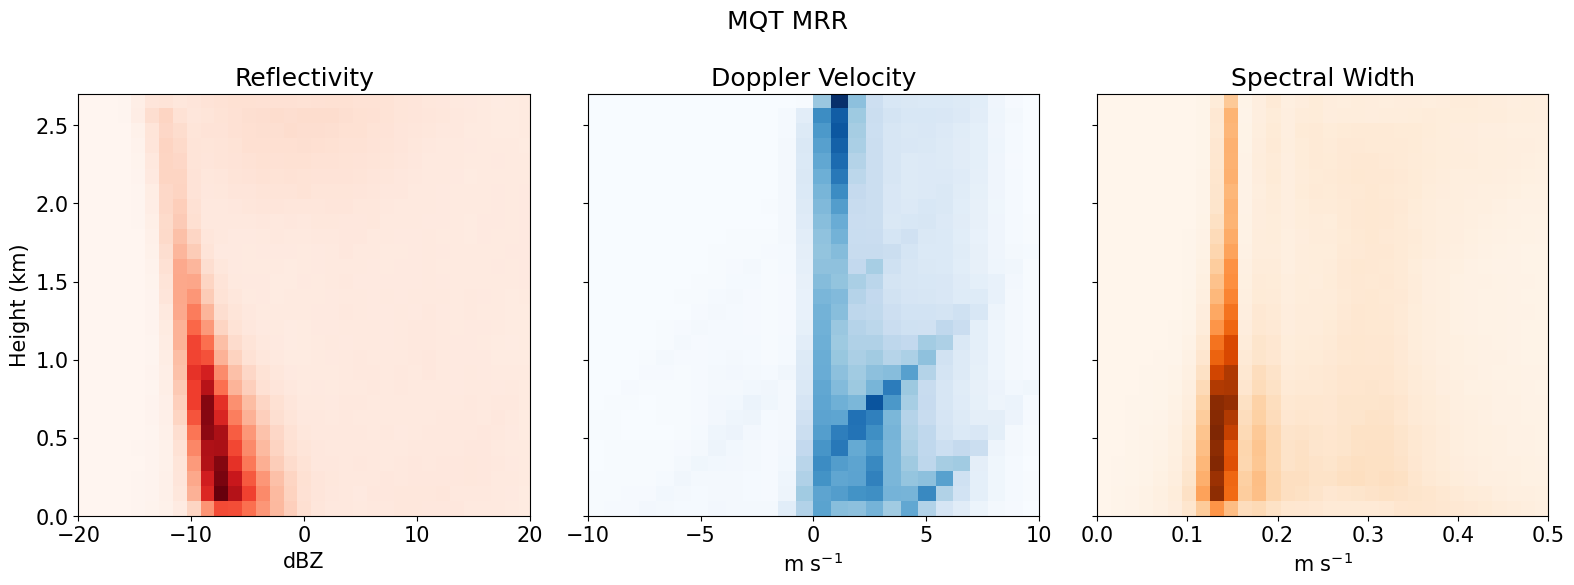

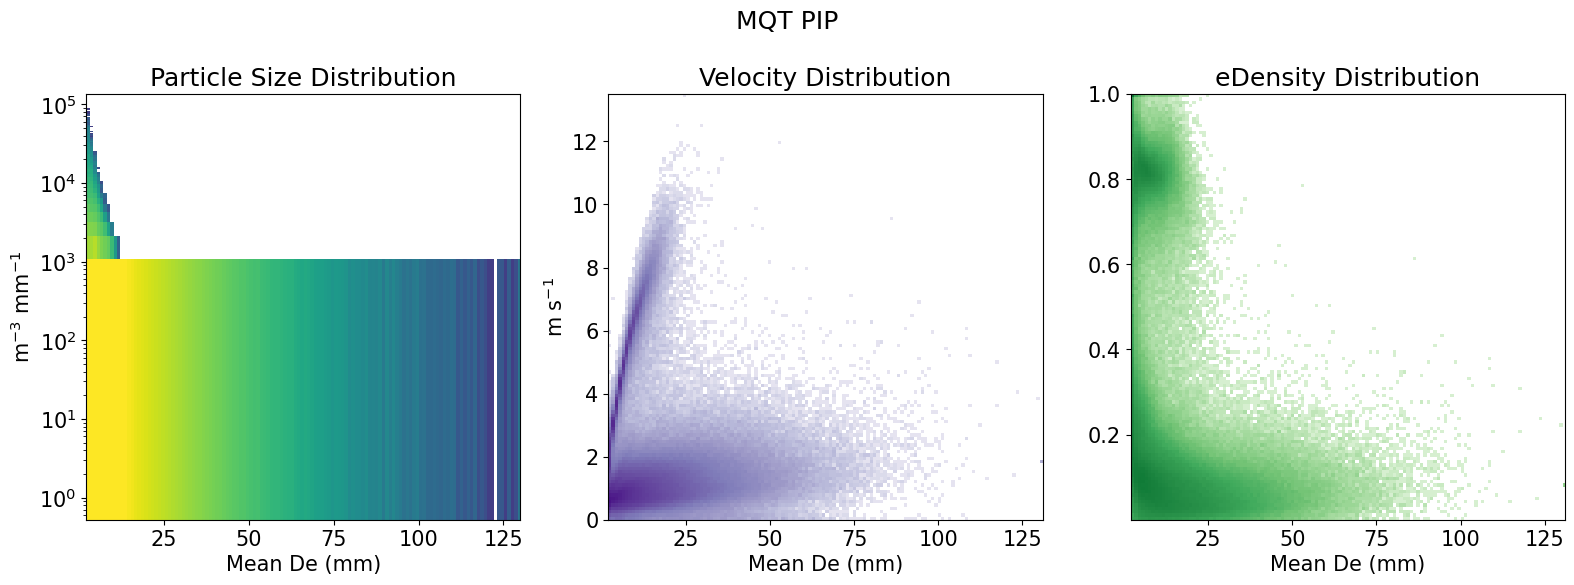

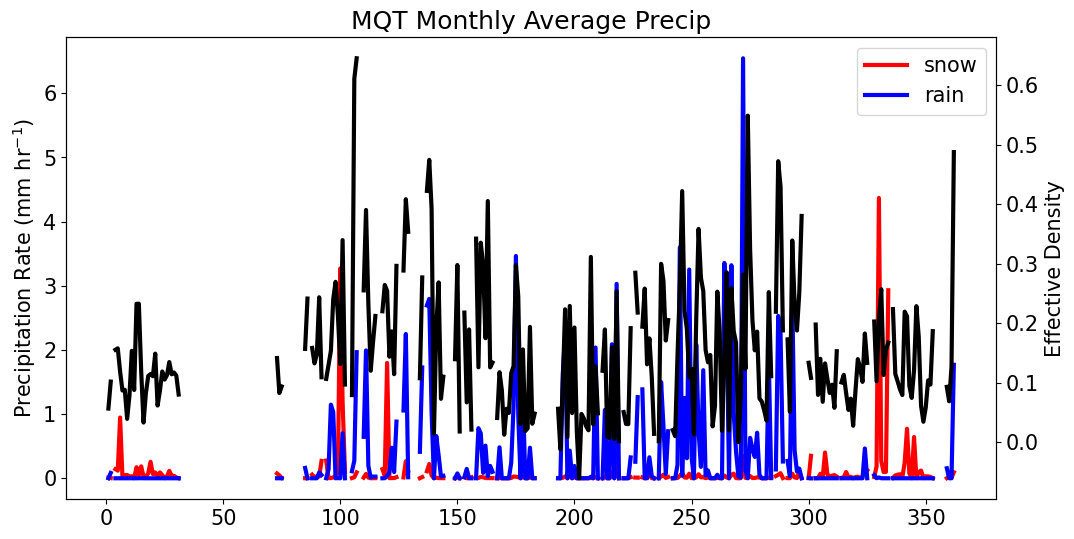

In [87]:

def get_day_of_year(date_string):
    date = datetime.strptime(date_string, '%Y%m%d')
    day_of_year = date.timetuple().tm_yday
    return day_of_year

def create_precip_plots(site):
    avg_snow = [[] for i in range(365)]
    avg_rain = [[] for i in range(365)]
    avg_ed = [[] for i in range(365)]
#     months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
    for date in matched_dates:
        doy = get_day_of_year(date)
        ds_lwe = xr.open_dataset(pip_path + '/edensity_lwe_rate/006' + date + '2350_01_P_Minute.nc')    
        snow = ds_lwe['nrr'].values  
        rain = ds_lwe['rr'].values
        ed = ds_lwe['ed'].values
        avg_snow[doy-1].append(np.nanmean(snow))
        avg_rain[doy-1].append(np.nanmean(rain))
        avg_ed[doy-1].append(np.nanmean(ed))
        
    std_snow = [np.nanstd(x) for x in avg_snow]
    std_rain = [np.nanstd(x) for x in avg_rain]
    std_ed = [np.nanstd(x) for x in avg_ed]
    avg_snow = [np.nanmean(x) for x in avg_snow]
    avg_rain = [np.nanmean(x) for x in avg_rain]
    avg_ed = [np.nanmean(x) for x in avg_ed]

    fig, axes = plt.subplots(figsize=(12,6))
    axes.set_title(site + " Monthly Average Precip")
    axes.plot(np.arange(365), avg_snow, color='red', linewidth=3, label='snow')
    axes.plot(np.arange(365), avg_rain, color='blue', linewidth=3, label='rain')
    axes.set_ylabel('Precipitation Rate (mm hr$^{-1}$)')
    plt.legend()
    ax2 = axes.twinx()
    ax2.plot(np.arange(365), avg_ed, color='black', linewidth=3)
    ax2.set_ylabel('Effective Density')
    ax2.set_xlabel('Month')
    plt.savefig('../images/' + site + '_precip.png')

def create_hists_for_site(site):
    ze_list = []
    dv_list = []
    sw_list = []
    mrr_height_list = []

    dsd_list = []
    dsd_height_list = []
    vvd_list = []
    vvd_height_list = []
    rho_list = []
    rho_height_list = []

    for date in matched_dates:
    #     print("Getting date", date)
        year = date[:4]
        month = date[4:6]
        day = date[-2:]
        date = year + month + day

        # MRR
        ds_mrr = xr.open_dataset(mrr_path + 'MRR_NWS_' + SITE + '_' + date + '_snow.nc')
        ze = ds_mrr['Ze'].values
        dv = ds_mrr['W'].values
        sw = ds_mrr['spectralWidth'].values
        mrr_height = np.repeat(np.arange(1, 32), ze.shape[0])

        ze_list.append(ze.T.flatten())
        dv_list.append(dv.T.flatten())
        sw_list.append(sw.T.flatten())
        mrr_height_list.append(mrr_height)

        # PIP
        ds_pip = xr.open_dataset(pip_path + '/particle_size_distributions/006' + date + '2350_01_dsd.nc')   
        dsd = ds_pip['psd'].values
        dsd_height = np.repeat(np.arange(1, 132), dsd.shape[0])
        dsd_list.append(dsd.T.flatten())
        dsd_height_list.append(dsd_height)

        ds_pip = xr.open_dataset(pip_path + '/velocity_distributions/006' + date + '2350_01_vvd_A.nc')
        vvd = ds_pip['vvd'].values
        vvd_height = np.repeat(np.arange(1, 132), vvd.shape[0])
        vvd_list.append(vvd.T.flatten())
        vvd_height_list.append(vvd_height)

        ds_pip = xr.open_dataset(pip_path + '/edensity_distributions/006' + date + '2350_01_rho_Plots_D_minute.nc')   
        rho = ds_pip['rho'].values
        rho_height = np.repeat(np.arange(1, 132), rho.shape[0])
        rho_list.append(rho.T.flatten())
        rho_height_list.append(rho_height)

    ze_ds = np.concatenate(ze_list)
    dv_ds = np.concatenate(dv_list)
    sw_ds = np.concatenate(sw_list)
    mrr_height_ds = np.concatenate(mrr_height_list)

    dsd_ds = np.concatenate(dsd_list)
    dsd_height_ds = np.concatenate(dsd_height_list)
    vvd_ds = np.concatenate(vvd_list)
    vvd_height_ds = np.concatenate(vvd_height_list)
    rho_ds = np.concatenate(rho_list)
    rho_height_ds = np.concatenate(rho_height_list)

    ze_x = np.asarray(ze_ds).flatten()
    ze_y = np.asarray(mrr_height_ds).flatten()
    ze_x[ze_x<-30] = np.nan
    mask = ~np.isnan(ze_x)
    ze_x = ze_x[mask]
    ze_y = ze_y[mask]
    ze_hist, ze_xedges, ze_yedges = np.histogram2d(ze_y, ze_x, bins=[28, 64])

    dv_x = np.asarray(dv_ds).flatten()
    dv_y = np.asarray(mrr_height_ds).flatten()
    dv_x[dv_x<-30] = np.nan
    dv_x[dv_x>30] = np.nan
    mask = ~np.isnan(dv_x)
    dv_x = dv_x[mask]
    dv_y = dv_y[mask]
    dv_hist, dv_xedges, dv_yedges = np.histogram2d(dv_y, dv_x, bins=[28, 64])

    sw_x = np.asarray(sw_ds).flatten()
    sw_y = np.asarray(mrr_height_ds).flatten()
    sw_x[sw_x<0] = np.nan
    sw_x[sw_x>1] = np.nan
    mask = ~np.isnan(sw_x)
    sw_x = sw_x[mask]
    sw_y = sw_y[mask]
    sw_hist, sw_xedges, sw_yedges = np.histogram2d(sw_y, sw_x, bins=[28, 64])

    fig, axes = plt.subplots(1, 3, figsize=(16,6), sharey=True)
    fig.suptitle(site + ' MRR')
    axes[0].set_title("Reflectivity")
    axes[0].imshow(ze_hist, origin='lower', cmap='Reds', aspect='auto', extent=[ze_yedges[0], ze_yedges[-1], ze_xedges[0], ze_xedges[-1]])
    axes[0].invert_yaxis()
    axes[0].set_xlim((-20, 20))
    formatter = ticker.FuncFormatter(lambda y, pos: f'{y/10:.1f}')
    axes[0].yaxis.set_major_formatter(formatter)
    labels = [item.get_text() for item in axes[0].get_yticklabels()]
    axes[0].set_yticklabels(labels[::-1])
    axes[0].set_xlabel("dBZ")
    axes[0].set_ylabel("Height (km)")
    axes[1].set_title("Doppler Velocity")
    axes[1].imshow(dv_hist, origin='lower', cmap='Blues', aspect='auto', extent=[dv_yedges[0], dv_yedges[-1], dv_xedges[0], dv_xedges[-1]])
    axes[1].invert_yaxis()
    axes[1].set_xlabel("m s$^{-1}$")
    axes[1].set_xlim((-10, 10))
    axes[2].set_title("Spectral Width")
    axes[2].imshow(sw_hist, origin='lower', cmap='Oranges', aspect='auto', extent=[sw_yedges[0], sw_yedges[-1], sw_xedges[0], sw_xedges[-1]])
    axes[2].invert_yaxis()
    axes[2].set_xlabel("m s$^{-1}$")
    axes[2].set_xlim((0, 0.5))
    plt.tight_layout()
    plt.savefig('../images/' + site + '_mrr.png')

    # PIP
    dsd_x = np.asarray(dsd_ds).flatten()
    dsd_y = np.asarray(dsd_height_ds).flatten()
    dsd_x[dsd_x<=0] = np.nan
    mask = ~np.isnan(dsd_x)
    dsd_x = dsd_x[mask]
    dsd_y = dsd_y[mask]
    dsd_hist, dsd_xedges, dsd_yedges = np.histogram2d(dsd_y, dsd_x, bins=[128, 128])
    
    vvd_x = np.asarray(vvd_ds).flatten()
    vvd_y = np.asarray(vvd_height_ds).flatten()
    vvd_x[vvd_x<=0] = np.nan
    mask = ~np.isnan(vvd_x)
    vvd_x = vvd_x[mask]
    vvd_y = vvd_y[mask]
    vvd_hist, vvd_xedges, vvd_yedges = np.histogram2d(vvd_y, vvd_x, bins=[128, 128])
    
    rho_x = np.asarray(rho_ds).flatten()
    rho_y = np.asarray(rho_height_ds).flatten()
    rho_x[rho_x<=0] = np.nan
    mask = ~np.isnan(rho_x)
    rho_x = rho_x[mask]
    rho_y = rho_y[mask]
    rho_hist, rho_xedges, rho_yedges = np.histogram2d(rho_y, rho_x, bins=[128, 128])

    fig, axes = plt.subplots(1, 3, figsize=(16,6), sharey=False)
    fig.suptitle(site + ' PIP')
    axes[0].set_title("Particle Size Distribution")
    axes[0].imshow(dsd_hist.T, origin='lower', cmap='viridis', aspect='auto', norm=LogNorm(vmin=0.1, vmax=25000), extent=[dsd_xedges[0], dsd_xedges[-1], dsd_yedges[0], dsd_yedges[-1]])
    axes[0].set_xlabel("Mean De (mm)")
#     bin_centers = ds_pip.bin_centers.values
#     ticks_idx = np.linspace(0, len(bin_centers) - 1, 6, dtype=int)
#     axes[0].set_yticks(ticks_idx)
#     axes[0].set_yticklabels(bin_centers[ticks_idx])
    axes[0].set_ylabel('m$^{−3}$ mm$^{−1}$')
    axes[0].set_yscale('log')
    axes[1].set_title("Velocity Distribution")
    axes[1].imshow(vvd_hist.T, origin='lower', cmap='Purples', aspect='auto', norm=LogNorm(vmin=0.1, vmax=25000), extent=[vvd_xedges[0], vvd_xedges[-1], vvd_yedges[0], vvd_yedges[-1]])
    axes[1].set_ylabel("m s$^{−1}$")
    axes[1].set_xlabel("Mean De (mm)")
#     axes[1].set_xlim((0, 8))
    axes[1].set_yscale('linear')
    axes[2].set_title("eDensity Distribution")
    axes[2].imshow(rho_hist.T, origin='lower', cmap='Greens', aspect='auto', norm=LogNorm(vmin=0.1, vmax=25000), extent=[rho_xedges[0], rho_xedges[-1], rho_yedges[0], rho_yedges[-1]])
    axes[2].set_xlabel("g cm$^{-3}$")
    axes[2].set_xlabel("Mean De (mm)")
    axes[2].set_yscale('linear')
    plt.tight_layout()
    plt.savefig('../images/' + site + '_pip.png')
    
create_hists_for_site('MQT')
create_precip_plots('MQT')
